In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import os


def symbol_to_path(symbol, base_dir='data'):
    """Return csv file path given ticker symbol"""
    return os.path.join(base_dir, "{}.csv".format(str(symbol)))


def get_data(symbols, dates):
    """Read stock data (adjusted close) for given symbols from CSV files"""
    df = pd.DataFrame(index=dates)
    
    # add SPY for reference, if absent
    if 'SPY' not in symbols:
        symbols.insert(0, 'SPY')
        
    for symbol in symbols:
        df_temp = pd.read_csv(
            symbol_to_path(symbol),
            index_col='Date',
            parse_dates=True,
            usecols=['Date', 'Adj Close'],
            na_values=['nan'])
    
        # rename to prevent crashing
        df_temp = df_temp.rename(columns={'Adj Close': symbol})

        # Join
        df = df.join(df_temp)
        
        # drop dates SPY did not trade
        if symbol == 'SPY':
            df = df.dropna(subset=['SPY'])
    
    df.fillna(method="ffill", inplace=True)
    df.fillna(method="bfill", inplace=True)
    return df


def plot_data(df, title="Stock prices", xlabel='Date', ylabel='Prices'):
    """Plot stock prices with a custom title and meaningful axis labels"""
    ax = df.plot(title=title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    
    plt.show()

### Histogram

![](./img/1_06_Histogram.jpg "Histogram")

In [3]:
def compute_daily_returns(df):
    """Compute and return the daily return values."""
    daily_returns = (df / df.shift(1)) - 1
    
    # Set daily returns for row 0 to 0
    daily_returns.iloc[0, :] = 0
    return daily_returns

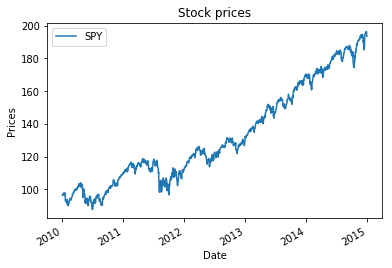

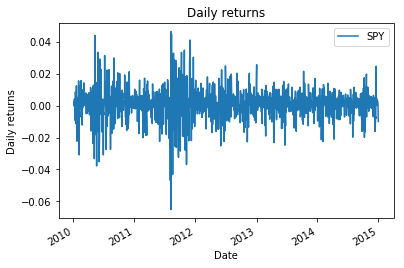

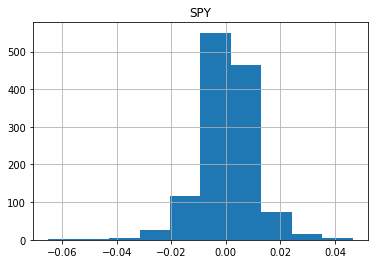

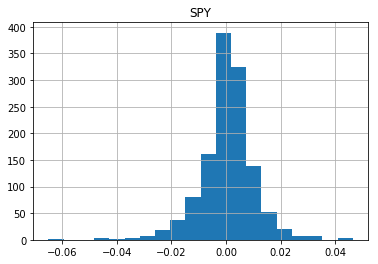

In [4]:
# Read data
dates = pd.date_range('2010-01-01', '2014-12-31')
symbols = ['SPY']
df = get_data(symbols, dates)

# Plot data
plot_data(df)

# Compute and plot daily return
daily_returns = compute_daily_returns(df)
plot_data(daily_returns, title='Daily returns', ylabel='Daily returns')

# Plot daily returns histogram
daily_returns.hist()
daily_returns.hist(bins=20)
plt.show()

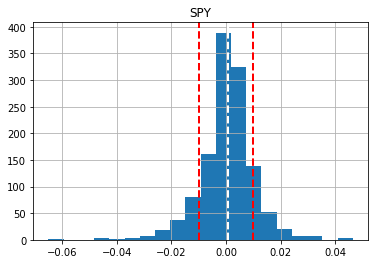

In [5]:
# Add mean and std to histogram
mean = daily_returns['SPY'].mean()
std = daily_returns['SPY'].std()

daily_returns.hist(bins=20)
plt.axvline(mean, color='w', linestyle='dashed', linewidth=2)
plt.axvline(std, color='r', linestyle='dashed', linewidth=2)
plt.axvline(-std, color='r', linestyle='dashed', linewidth=2)
plt.show()

In [6]:
# Compute Kurtosis
daily_returns.kurtosis()

SPY    4.334759
dtype: float64

### Histogram comparison

![](./img/1_06_Histogram_compare.jpg "Histogram compare")

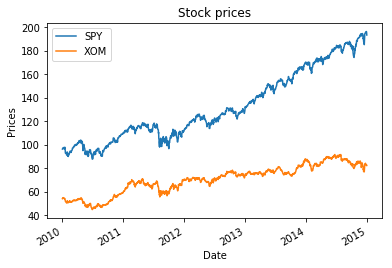

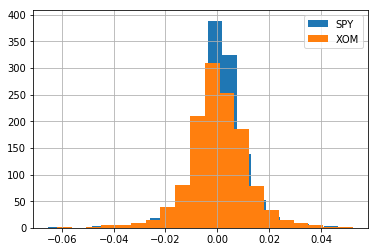

In [7]:
# Read data
dates = pd.date_range('2010-01-01', '2014-12-31')
symbols = ['SPY', 'XOM']
df = get_data(symbols, dates)

# Plot data
plot_data(df)

# Compute daily return
daily_returns = compute_daily_returns(df)

# Plot daily returns histogram on the same charts
daily_returns['SPY'].hist(bins=20, label='SPY')
daily_returns['XOM'].hist(bins=20, label='XOM')
plt.legend(loc='upper right')
plt.show()

### Scatter plot

![](./img/1_06_Scatterplot.jpg "Scatterplot")

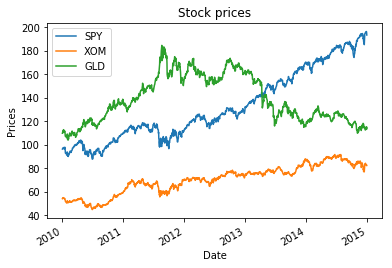

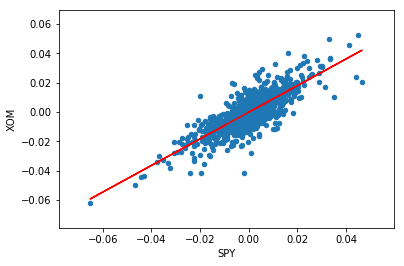

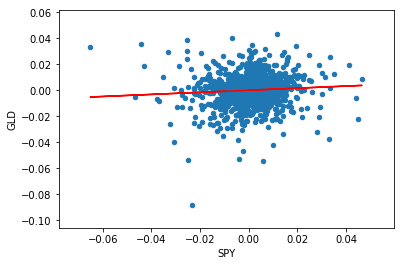

In [8]:
# Read data
dates = pd.date_range('2010-01-01', '2014-12-31')
symbols = ['SPY', 'XOM', 'GLD']
df = get_data(symbols, dates)

# Plot data
plot_data(df)

# Compute daily return
daily_returns = compute_daily_returns(df)

# scatterplot SPY vs XOM
daily_returns.plot(kind='scatter', x='SPY',y='XOM')
beta_XOM, alpha_XOM = np.polyfit(daily_returns['SPY'], daily_returns['XOM'], 1)
plt.plot(daily_returns['SPY'], beta_XOM*daily_returns['SPY'] + alpha_XOM, '-', color='r')
plt.show()

# scatterplot SPY vs GLD
daily_returns.plot(kind='scatter', x='SPY',y='GLD')
beta_GLD, alpha_GLD = np.polyfit(daily_returns['SPY'], daily_returns['GLD'], 1)
plt.plot(daily_returns['SPY'], beta_GLD*daily_returns['SPY'] + alpha_GLD, '-', color='r')
plt.show()

![](./img/1_06_corr_vs_slope.jpg "Corr vs slope")

In [9]:
# correlation coefficient
daily_returns.corr(method='pearson')

,SPY,XOM,GLD
SPY,1.000000,0.79839,0.070731
XOM,0.798390,1.00000,0.121150
GLD,0.070731,0.12115,1.000000


In [10]:
# slope
print "XOM beta =", beta_XOM, "- XOM alpha =", alpha_XOM
print "GLD beta =", beta_GLD, "- GLD alpha =", alpha_GLD

XOM beta = 0.90756066772 - XOM alpha = -0.000149436955847
GLD beta = 0.0800165610905 - GLD alpha = 4.27509104879e-05
